## ANOVA 

Tabela ANOVA:
               sum_sq    df         F    PR(>F)
C(Metodo)   89.922020   2.0  1.165612  0.347436
QI          22.098226   1.0  0.572895  0.465014
Residual   424.301774  11.0       NaN       NaN


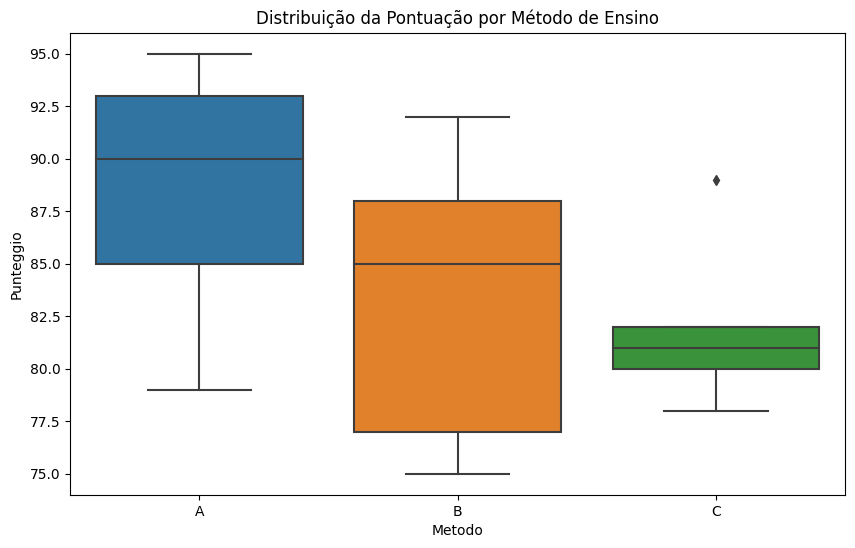

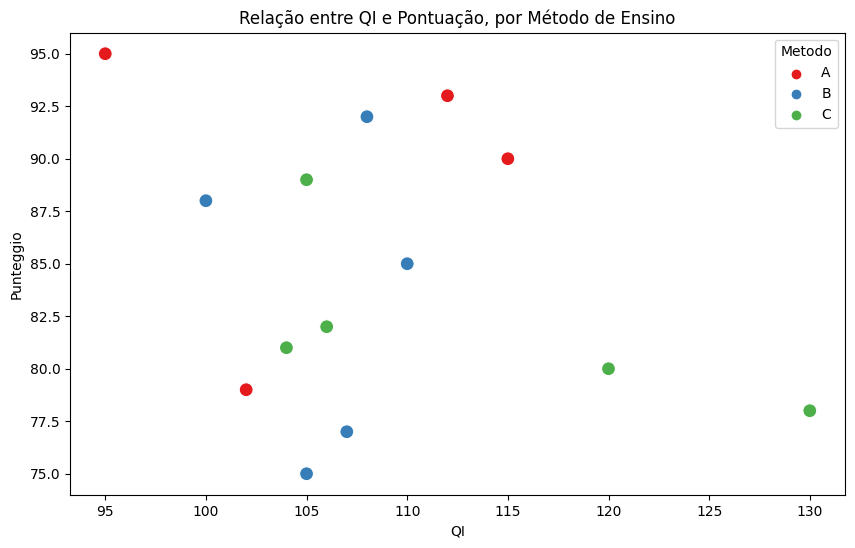

c:\Users\Enzo Schitni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Enzo Schitni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


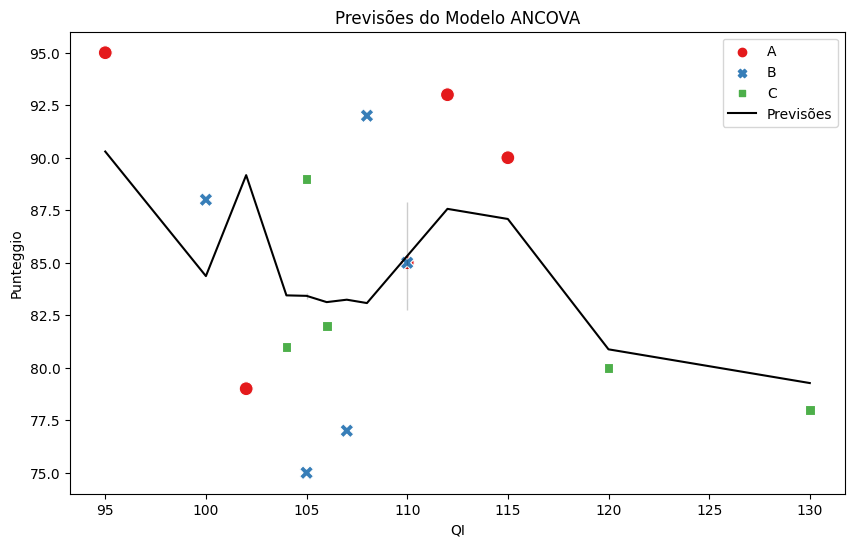

In [4]:
import statsmodels.api as sm
import pandas as pd
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt

# Criação do DataFrame
data = {
    'Punteggio': [85, 90, 88, 75, 80, 78, 95, 85, 89, 93, 92, 81, 79, 77, 82],
    'Metodo': ['A', 'A', 'B', 'B', 'C', 'C', 'A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C'],
    'QI': [110, 115, 100, 105, 120, 130, 95, 110, 105, 112, 108, 104, 102, 107, 106]
}

df = pd.DataFrame(data)

# Ajuste do Modelo ANCOVA
model = ols('Punteggio ~ C(Metodo) + QI', data=df).fit()

# Cálculo da Tabela ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print("Tabela ANOVA:")
print(anova_table)

# Gerando gráficos para visualização

# Boxplot para visualização da distribuição da pontuação por método
plt.figure(figsize=(10, 6))
sns.boxplot(x='Metodo', y='Punteggio', data=df)
plt.title('Distribuição da Pontuação por Método de Ensino')
plt.show()

# Scatterplot para visualizar a relação entre QI e Punteggio, colorido por Metodo
plt.figure(figsize=(10, 6))
sns.scatterplot(x='QI', y='Punteggio', hue='Metodo', data=df, palette='Set1', s=100)
plt.title('Relação entre QI e Pontuação, por Método de Ensino')
plt.show()

# Plotando as previsões do modelo ajustado
df['Predicted'] = model.fittedvalues

plt.figure(figsize=(10, 6))
sns.scatterplot(x='QI', y='Punteggio', hue='Metodo', data=df, palette='Set1', s=100, style='Metodo')
sns.lineplot(x='QI', y='Predicted', data=df, color='black', label='Previsões')
plt.title('Previsões do Modelo ANCOVA')
plt.show()